# 6) White wine ANN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
data = pd.read_csv('winequality-white.csv', low_memory=False, sep=';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#converting the response variables(3-7) as binary response variables that is either good or bad

#names = ['bad', 'good']
#bins = (2, 6.5, 9)

#data['quality'] = pd.cut(data['quality'], bins = bins, labels = names)

data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good',
                                      9: 'bad'})

In [5]:
# analyzing the different values present in the dependent variable(quality column)
data['quality'].value_counts()

good    3253
bad     1645
Name: quality, dtype: int64

In [6]:
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])
data['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      0
11      0
12      0
13      1
14      0
15      1
16      1
17      1
18      1
19      0
20      1
21      1
22      1
23      0
24      1
25      1
26      1
27      1
28      1
29      1
       ..
4868    1
4869    1
4870    1
4871    1
4872    0
4873    1
4874    1
4875    1
4876    1
4877    0
4878    0
4879    1
4880    1
4881    1
4882    0
4883    1
4884    0
4885    1
4886    1
4887    1
4888    0
4889    1
4890    1
4891    1
4892    0
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 4898, dtype: int32>

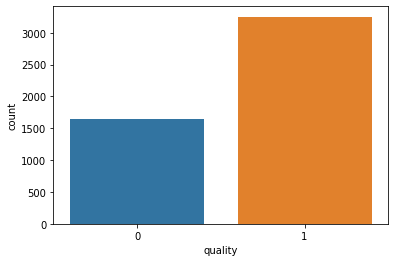

In [7]:
sns.countplot(data['quality'])

In [8]:
# dividing the dataset into dependent and independent variables

x = data.iloc[:,:11]
y = data.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(4898, 11)
(4898,)


In [9]:
# dividing the dataset in training and testing set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3673, 11)
(3673,)
(1225, 11)
(1225,)


In [10]:
# standard scaling 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [11]:
# creating the model
model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)

# feeding the training data to the model
model.fit(x_train, y_train)

# calculating the accuracies
print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

training accuracy : 0.9360196025047645
testing accuracy : 0.7869387755102041


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [16]:
#creating the model
model = Sequential()

# first hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 11))

# second hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))

# output layer
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100
3673/3673 [==============================] - 1s 228us/step - loss: 0.6031 - acc: 0.6845
Epoch 2/100
3673/3673 [==============================] - 1s 139us/step - loss: 0.5127 - acc: 0.7555
Epoch 3/100
3673/3673 [==============================] - 1s 206us/step - loss: 0.5026 - acc: 0.7637
Epoch 4/100
3673/3673 [==============================] - 1s 146us/step - loss: 0.4980 - acc: 0.7650
Epoch 5/100
3673/3673 [==============================] - 1s 146us/step - loss: 0.4943 - acc: 0.7678
Epoch 6/100
3673/3673 [==============================] - 1s 147us/step - loss: 0.4918 - acc: 0.7697
Epoch 7/100
3673/3673 [==============================] - 1s 136us/step - loss: 0.4907 - acc: 0.7659
Epoch 8/100
3673/3673 [==============================] - 0s 135us/step - loss: 0.4883 - acc: 0.7680
Epoch 9/100
3673/3673 [==============================] - 1s 139us/step - loss: 0.4868 - acc: 0.7699
Epoch 10/100
3673/3673 [==============================] - 1s 141us/step - loss: 0.4852 - acc: 0.7689

3673/3673 [==============================] - 0s 126us/step - loss: 0.4604 - acc: 0.7822
Epoch 82/100
3673/3673 [==============================] - 0s 118us/step - loss: 0.4611 - acc: 0.7819
Epoch 83/100
3673/3673 [==============================] - 0s 124us/step - loss: 0.4610 - acc: 0.7857
Epoch 84/100
3673/3673 [==============================] - 1s 138us/step - loss: 0.4607 - acc: 0.7857
Epoch 85/100
3673/3673 [==============================] - 0s 123us/step - loss: 0.4610 - acc: 0.7830
Epoch 86/100
3673/3673 [==============================] - 0s 113us/step - loss: 0.4609 - acc: 0.7841
Epoch 87/100
3673/3673 [==============================] - 0s 118us/step - loss: 0.4610 - acc: 0.7844
Epoch 88/100
3673/3673 [==============================] - 0s 121us/step - loss: 0.4602 - acc: 0.7830
Epoch 89/100
3673/3673 [==============================] - 0s 133us/step - loss: 0.4592 - acc: 0.7816
Epoch 90/100
3673/3673 [==============================] - 0s 125us/step - loss: 0.4600 - acc: 0.7811
Epo